# Plan de trabajo: Análisis exploratorio de datos 

El plan de elaboración del proyecto se distruibuirá de la siguiente forma:

- Se analizará la información asignada por la persona a cargo del proyecto, buscando datos clave para generar preguntas aclaratorias que nos permitan comenzar acciones de manera eficaz y clara. Por otra parte, se realizará un Exploratory Data Analysis (EDA) para entender la distribucion de los datos en los diferentes archivos disponibles para la exploración, asi como para descubrir insights importantes para el cliente. A esta etapa la llamaremos Importación y revisión de datos.
- Después se harán visualizaciones de los insights clave para entender el objetivo: el church de clientes. Lo que conoceremos como visualización de datos.
- Enseguida se comenzará con la preparación de datos para el modelado. Esta será la parte 3. Preparación del modelado.
- A continuación se pondrá a prueba el modelado predictivo (clasificación binaria) para aplicación y evaluación de modelos. A la que asignaremos como la fase de Modelado predictivo.
- Finalmente se identificarán las conclusiones y recomendaciones del proyecto. 

Esta será la estructura básica del plan, a continuación se detallará cada sección de nuestro plan de trabajo. 

## Objetivo general

Analizar los datos disponibles de los clientes de la compañía de telecomunicaciones para identificar posibles aptrones o catacterísticas relacionadas con la **fuga (churn) de clientes**.

## Plan de acción : Importación y revisión de datos.

1. Para comenzar con nuestro analisis de datos es necesario importar los archivos necesarios y manejarlos o limpiarlos de la manera mas eficiente para nuestras necesidades, en esta ocasión enlazaremos todos los archivos mediante el método merge() para que sea mas fácil trabajar con los datos, se aprovechará la columna del ID del cliente para que nuestros archivos sean capaces de estar en conjunto. 
2. Una vez listo nuestro df total, se hará una lectura general de nuestro df, mediante metodos como info(), describe(), unique().
3. Se aplicará limpieza de datos, en las que se tomarán en cuenta los valores nulos, duplicados y su tipo de datos. 
4. La fecha de contrato que menciona el resumen no son los unicos datos que nos servirán, sin embargo, manejaremos las fechas para ver insights entre los tipos de planes de la empresa. 
5. Analizar la distribución de variables clave como tipo de contrato, servicios activos, forma de pago, total facturado.
6. Examinar correlaciones entre variables y la columna de “churn” (si está disponible).


## Preguntas aclaratorias 

1. ¿Qué variable específica del dataset indica si un cliente ha abandonado el servicio?
2. ¿Podemos asumir que los datos de fechas anteriores a 2020 también son válidos, aunque el resumen mencione febrero de 2020?
3. ¿Debemos enfocar el análisis solo en clientes activos, inactivos o ambos?
4. ¿Qué metricas o resultados espera el equipo como entregables principales (por ejemplo, visualizaciones, KPIs, recomendaciones)?
5. ¿Se permite agregar fuentes externas o usar librerías específicas para enriquecer el análisis?

### 1. Carga y revisión de datos 
- Unificar los distintos archivos CSV ().

- Validar tipos de datos, valores nulos y duplicados para asegurar consistencia. 

In [1269]:
#Se importan las librerias que se necesitan para nuestro script
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from lightgbm import LGBMClassifier

En las celdas debajo, se leen los distintos archivos como diferentes dataframes con los cuales trabajar en el analisis exploratorio de datos, mediante el metodo de pd.read de pandas y mostramos una vista general de los datos con el metodo info para tener una primera impresion de nuestros dataset.

In [1270]:
df_contract = pd.read_csv(r"/workspaces/my_last_dance/My_last_dance/final_provider/contract.csv")
print(f"La información general de contract es: {df_contract.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
La información general de contract es: None


In [1271]:
df_internet = pd.read_csv(r"/workspaces/my_last_dance/My_last_dance/final_provider/internet.csv")
print(f"La información general de internet es: {df_internet.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
La información general de internet es: None


In [1272]:
df_personal = pd.read_csv(r"/workspaces/my_last_dance/My_last_dance/final_provider/personal.csv")
print(f"La información general de personal es: {df_personal.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
La información general de personal es: None


In [1273]:
df_phone = pd.read_csv(r"/workspaces/my_last_dance/My_last_dance/final_provider/phone.csv")
print(f"La información general de phone es: {df_phone.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
La información general de phone es: None


### 2. Limpieza y transformación
- Convertir columnas relevantes como fechas y montos (`BeginDate`, `EndDate`, `TotalCharges`) a tipos adecuados (`datetime`, `float`).
- Rellenar o eliminar valores faltantes según contexto (por ejemplo, imputar con la media o moda, o eliminar si son pocos).
- Estandarizar columnas categóricas y manejar casos como “No” o valores atípicos.

### 2.1. Informacion general de nuestros datos. ### 

Inicia nuestra limpieza de datos

Despues de haber leido todos los archivos correctamente y ver una muy ligera muestra de su contenido procedemos a limpiarlos correctamente antes de comenzar con un analisis, esto nos ayudara a mantener nuestros metodos e instrucciones en orden para que sean ejecutados sin problemas, 

In [1274]:
#Creamos un diccionario que contenga todos nuestros datafset
dfs = {
    "Contrato": df_contract,
    "Internet": df_internet,
    "Personal": df_personal,
    "Teléfono": df_phone
}

In [1275]:
#Creamos un bucle for para leer las primeras columnas de cada df sin repetir tanto codigo.
for nombre, df in dfs.items():
    print(f"\n📄 Información de las primeras 5 líneas del DataFrame '{nombre}':\n")
    print(df.head(10))
print()



📄 Información de las primeras 5 líneas del DataFrame 'Contrato':

   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   
5  9305-CDSKC  2019-03-01  2019-11-01 00:00:00  Month-to-month   
6  1452-KIOVK  2018-04-01                   No  Month-to-month   
7  6713-OKOMC  2019-04-01                   No  Month-to-month   
8  7892-POOKP  2017-07-01  2019-11-01 00:00:00  Month-to-month   
9  6388-TABGU  2014-12-01                   No        One year   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
0              Yes           Electronic check           29.85        29.85  
1               No               Mailed check       

Gracias a esta primera muestra de nuestros datos nos dimos cuenta de que todos tienen en comun la columna del customerID, que hay muchas columnas booleanas, tambien se puede notar que hay columnas con caracteres raros como en endDate, en las que se podria estar esperando una fecha. 

### 2.2. Transformacion de nuestros dfs ###

Trabajar con un solo df es mejor que trabajar con varios al mismo tiempo, esto nos dara un orden increible a la hora de hacer nuestro analisis, puesto que todos los datos estaran relacionados de alguna forma. 

In [1276]:
#Unimos nuestros df mediante el metodo merge, a traves de la columna de customer id
df = df_contract.merge(df_internet, on="customerID", how= "left")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
dtypes: float64(1), object(14)
memory usage: 825.5+ KB
None


In [1277]:
df= df.merge(df_personal, on= "customerID", how="left")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  gender            7043 non-null   object 
 16  SeniorCitizen     7043 non-null   int64  


In [1278]:
df= df.merge(df_phone, on="customerID", how="left")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  gender            7043 non-null   object 
 16  SeniorCitizen     7043 non-null   int64  


### 2.3. Limpieza y transformacion de columnas de tipo fecha ###

Parte importante de nuestro primer vistazo general de nuestros datos es que podemos observar si el contenido de la columna se relaciona correctamente con su tipo de dato, es prioridad conocer esto para una evaluacion correcta de datos futura, sobre todo si se piensa generar un modelo de machine learning. 

In [1279]:
# Definir la fecha fija de hoy
today = pd.to_datetime("2025-04-14").normalize()
df["EndDate"] = df["EndDate"].replace("No", today)

df["EndDate"] = pd.to_datetime(df["EndDate"], errors="coerce").dt.normalize()
df["BeginDate"] = pd.to_datetime(df["BeginDate"], errors='coerce').dt.normalize()

# Generamos la columna 'IsToday'
df["IsToday"] = (df["EndDate"] == today).astype(int)

# Vemos resultados
print(f"Se muestran las primeras filas de la columna 'EndDate':\n{df['EndDate'].head()}")
print(f"\nSe muestran las primeras filas de la columna 'BeginDate':\n{df['BeginDate'].head()}")
print("\nClientes activos (EndDate == today):")
#print(df[df["IsToday"] == 1])
print("\nConteo de valores en 'IsToday':")
print(df["IsToday"].value_counts())


Se muestran las primeras filas de la columna 'EndDate':
0   2025-04-14
1   2025-04-14
2   2019-12-01
3   2025-04-14
4   2019-11-01
Name: EndDate, dtype: datetime64[ns]

Se muestran las primeras filas de la columna 'BeginDate':
0   2020-01-01
1   2017-04-01
2   2019-10-01
3   2016-05-01
4   2019-09-01
Name: BeginDate, dtype: datetime64[ns]

Clientes activos (EndDate == today):

Conteo de valores en 'IsToday':
IsToday
1    5174
0    1869
Name: count, dtype: int64


### 2.4. Limpieza y transformacion de columnas categoricas ###

En este caso, nuestra unica columna tratada como 'Category' será customerID, dado que solo es una columna que sirve para identificar a un cliente en especifico.

In [1280]:
df['customerID'] = df['customerID'].astype('category')

### 2.5. Manipulacion y transformacion de datos numericos ###

In [1281]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors = 'coerce')
print(df["TotalCharges"].isna().sum())
print(df["TotalCharges"].describe())
print()
print(df["MonthlyCharges"].isna().sum())
print(df["MonthlyCharges"].describe())

print(df["IsToday"].value_counts())


11
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

0
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64
IsToday
1    5174
0    1869
Name: count, dtype: int64


In [1282]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean()) #rellenamos los datos nulos con la media de cargos totales. 
print(df["TotalCharges"].isna().sum())
df["InternetService"] = df["InternetService"].fillna(df["InternetService"].mode()[0])  #rellenamos los datos nulos con la media de cargos totales. 
print(df["InternetService"].isna().sum())

0
0


In [1283]:
df["MultipleLines"] = df["MultipleLines"].fillna(df["MultipleLines"].mode()[0]) #Llenamos valores nulos con el valor de moda, de esta forma no afecta a nuestro dataset. 
print(df["MultipleLines"].isna().sum())

0


Para los datos numericos suele ser muy util usar el metodo describe() para obtener una lectura general de los datos, minimos, maximos, etc, ayuda a obtener valores extremos que no deberian estar ahi, o que tienen alguna explicacion. 

In [1284]:
#Enseguida escribimos un codigo para empezar a tratar los valores unlos dentro de nuestro df. 
for column in df:
    print(f"{column}: {df[column].isna().sum()}")

customerID: 0
BeginDate: 0
EndDate: 0
Type: 0
PaperlessBilling: 0
PaymentMethod: 0
MonthlyCharges: 0
TotalCharges: 0
InternetService: 0
OnlineSecurity: 1526
OnlineBackup: 1526
DeviceProtection: 1526
TechSupport: 1526
StreamingTV: 1526
StreamingMovies: 1526
gender: 0
SeniorCitizen: 0
Partner: 0
Dependents: 0
MultipleLines: 0
IsToday: 0


## Plan de acción : visualización de datos.
- Crearemos distintos tipos de gráficas de visualización de acuerdo a los insights que encontremos, en los que esta planeado buscar por edades de las personas, tipo de servicio y tipo de adquisición de un plan. 
- Agrupar clientes por tipo de servicio, duración del contrato, método de pago, etc., y ver cómo se relacionan con la fuga.
- Crear gráficos descriptivos (barras, cajas, heatmaps) para visualizar diferencias y patrones.
- La manera en al que visualizaremos datos en esta ocasión será la libreria matplotlib. 

PaymentMethod
Bank transfer (automatic)    13.80
Credit card (automatic)      12.41
Electronic check             57.30
Mailed check                 16.48
Name: Porcentaje, dtype: float64


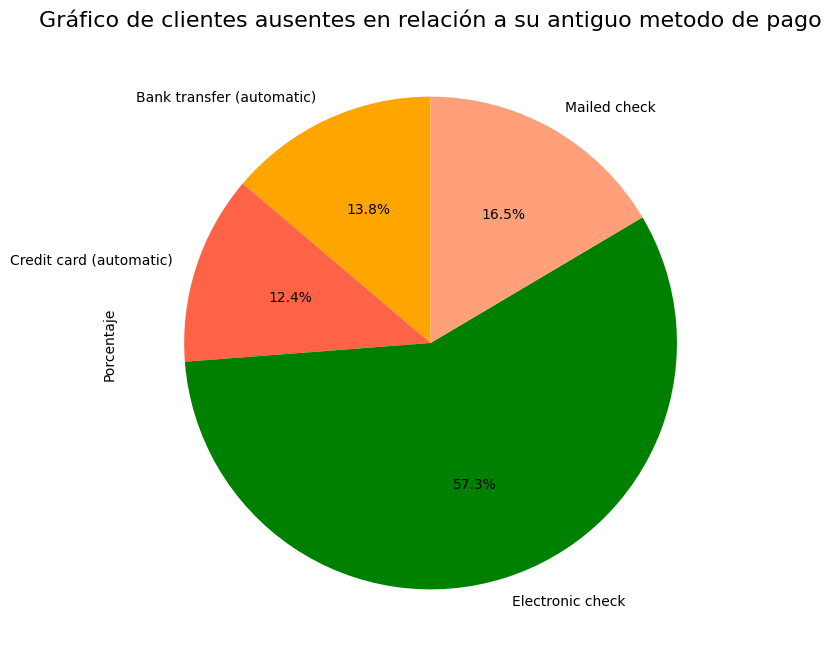

In [1285]:
#today = pd.Timestamp.today().normalize()

clients_stay = df[df["EndDate"] ==  today]
clients_go = df[df["EndDate"] !=  today]

clients_go_by_payment = clients_go.groupby("PaymentMethod").agg({"customerID": "count"})
clients_go_by_payment = clients_go_by_payment.rename(columns={"customerID": "NumClientes"})
total_clientes_go = clients_go_by_payment["NumClientes"].sum()
clients_go_by_payment["Porcentaje"] = (clients_go_by_payment["NumClientes"]/ total_clientes_go) * 100
clients_go_by_payment["Porcentaje"] = clients_go_by_payment["Porcentaje"].round(2)
print(clients_go_by_payment["Porcentaje"])

ax = clients_go_by_payment["Porcentaje"].plot(kind = "pie", autopct= "%1.1f%%", figsize= (8,8), colors= ["orange", "tomato", "green", "lightsalmon"], legend= False, startangle = 90)
plt.title("Gráfico de clientes ausentes en relación a su antiguo metodo de pago", fontsize=16)
plt.show()



Nos damos cuenta de que la comparación de clientes que se han ido comparados con el tipo de método que manejaban es un insight super valioso para el cliente. Pues mas del 50% de clientes ausentes usaban electronic check. Puede ser que hubiera problemas con la visualizacion de pago, o al ser un reflejo del pago mas lento, problemas con ver reflejado el pago y tener que estar dias sin servicio, hasta que se refelejara el pago. 

                           NumClientes
PaymentMethod                         
Bank transfer (automatic)         1286
Credit card (automatic)           1290
Electronic check                  1294
Mailed check                      1304
PaymentMethod
Bank transfer (automatic)    68.81
Credit card (automatic)      69.02
Electronic check             69.23
Mailed check                 69.77
Name: Porcentaje, dtype: float64


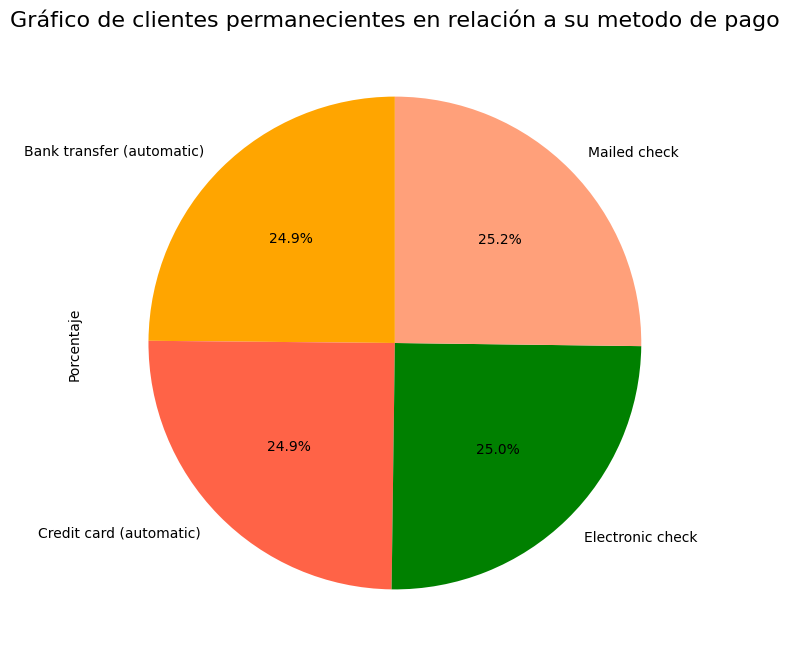

In [1286]:
clients_stay_by_payment = clients_stay.groupby("PaymentMethod").agg({"customerID": "count"})
clients_stay_by_payment = clients_stay_by_payment.rename(columns={"customerID": "NumClientes"})
print(clients_stay_by_payment)

total_clientes_stay = clients_go_by_payment["NumClientes"].sum()
clients_stay_by_payment["Porcentaje"] = (clients_stay_by_payment["NumClientes"]/ total_clientes_stay) * 100
clients_stay_by_payment["Porcentaje"] = clients_stay_by_payment["Porcentaje"].round(2)
print(clients_stay_by_payment["Porcentaje"])

ax = clients_stay_by_payment["Porcentaje"].plot(kind = "pie", autopct= "%1.1f%%", figsize= (8,8), colors= ["orange", "tomato", "green", "lightsalmon"], legend= False, startangle = 90)
plt.title("Gráfico de clientes permanecientes en relación a su metodo de pago", fontsize=16)
plt.show()


El mismo estudio aplicado a los clientes que siguen contratando el servicio nos muestra una mayor distibucion entre el metodo de pago.

In [1287]:
time_before_say_bye = clients_go["EndDate"] - clients_go["BeginDate"]
time_before_say_bye.describe()

count                           1869
mean     547 days 08:26:57.977528088
std      594 days 09:21:02.012639248
min                 30 days 00:00:00
25%                 61 days 00:00:00
50%                304 days 00:00:00
75%                883 days 00:00:00
max               2191 days 00:00:00
dtype: object

In [1288]:
grupo_1 = (time_before_say_bye >= pd.Timedelta("30 days")) & (time_before_say_bye <= pd.Timedelta("83 days"))
grupo_2 = (time_before_say_bye >= pd.Timedelta("84 days")) & (time_before_say_bye <= pd.Timedelta("306 days"))
grupo_3 = (time_before_say_bye >= pd.Timedelta("307 days")) & (time_before_say_bye <= pd.Timedelta("914 days"))
grupo_4 = time_before_say_bye > pd.Timedelta("914 days")

In [1289]:
print("Grupo '30 a 83 dias': ", grupo_1.sum())  # Suma los `True`, es equivalente a contar los clientes
print("Grupo '84 a 306 dias'", grupo_2.sum())
print("Grupo '307 a 914 dias'", grupo_3.sum())
print("Grupo 'mas de 914 dias' ", grupo_4.sum())
print(df["IsToday"].value_counts())


Grupo '30 a 83 dias':  503
Grupo '84 a 306 dias' 465
Grupo '307 a 914 dias' 457
Grupo 'mas de 914 dias'  444
IsToday
1    5174
0    1869
Name: count, dtype: int64


A pesar de que a veces creemos haber encontrado un insight muy valioso, simplemente nos equivocamos, pues el insight sobre la relacion del tiempo de duracion del cliente con el servicio, no esta ni cerca de estar relacionado, directamente por si solo con el churn de clientes. Sin embargo, esto tambien puede usarse, pues saber que el churn no depende de los dias activos, nos puede incluso quitar informacion que no es valioso para el entrenamiento de nuestros modelos. 

In [1290]:
is_not_senior = clients_go[clients_go['SeniorCitizen'] == 0 ]
is_senior = clients_go[clients_go['SeniorCitizen'] == 1 ]
print(is_senior['SeniorCitizen'].value_counts())
print()
print(is_not_senior['SeniorCitizen'].value_counts())


SeniorCitizen
1    476
Name: count, dtype: int64

SeniorCitizen
0    1393
Name: count, dtype: int64


In [1291]:
print(clients_go.shape[0])
print(clients_stay.shape[0])

1869
5174


In [1292]:
total = len(clients_go)
porcentaje_senior = len(is_senior) / total * 100
porcentaje_no_senior = len(is_not_senior) / total * 100

print(f"Porcentaje de adultos mayores: {porcentaje_senior:.2f}%")
print(f"Porcentaje de adultos no mayores: {porcentaje_no_senior:.2f}%")

Porcentaje de adultos mayores: 25.47%
Porcentaje de adultos no mayores: 74.53%


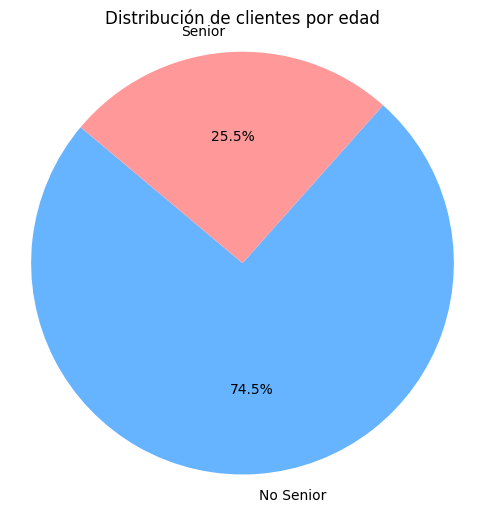

In [1293]:
labels = ['No Senior', 'Senior']
sizes = [porcentaje_no_senior, porcentaje_senior]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribución de clientes por edad')
plt.axis('equal')  # Hace que el pastel se vea circular
plt.show()

Sin embargo, asi como hay insights que parecen valiosos y no lo son, hay otros que parecen no serlo, pero nos dan datos inesperados... pues parece que las personas mayores tienden a ser clientes leales, a diferencia de los jovenes, que parecen estar dispuestos a estar probando cosas diferentes constantemente. 

In [1294]:
is_not_senior_stay = clients_stay[clients_stay['SeniorCitizen'] == 0 ]
is_senior_stay = clients_stay[clients_stay['SeniorCitizen'] == 1 ]
print(is_senior_stay['SeniorCitizen'].value_counts())
print()
print(is_not_senior_stay['SeniorCitizen'].value_counts())

SeniorCitizen
1    666
Name: count, dtype: int64

SeniorCitizen
0    4508
Name: count, dtype: int64


In [1295]:
total_stay = len(clients_stay)
porcentaje_senior_stay = len(is_senior_stay) / total_stay * 100
porcentaje_no_senior_stay = len(is_not_senior_stay) / total_stay * 100

print(f"Porcentaje de adultos mayores: {porcentaje_senior_stay:.2f}%")
print(f"Porcentaje de adultos no mayores: {porcentaje_no_senior_stay:.2f}%")

Porcentaje de adultos mayores: 12.87%
Porcentaje de adultos no mayores: 87.13%


Como podemos observar, la gran mayoria de clientes que siguen con el servicio, son personas mayores, con un 83%


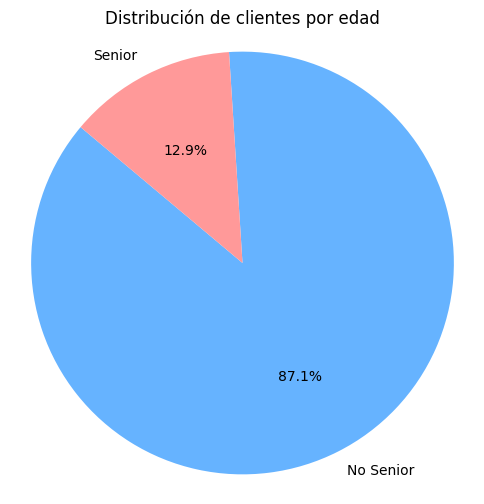

In [1296]:
labels = ['No Senior', 'Senior']
sizes = [porcentaje_no_senior_stay, porcentaje_senior_stay]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribución de clientes por edad')
plt.axis('equal')  # Hace que el pastel se vea circular
plt.show()

In [1297]:
clients_go_with_partner = clients_go[clients_go['Partner']== 'Yes']
clients_go_without_partner = clients_go[clients_go['Partner']== 'No']
clients_stay_with_partner = clients_stay[clients_stay['Partner']== 'Yes']
clients_stay_without_partner = clients_stay[clients_stay['Partner']== 'No']

print(clients_go_with_partner['Partner'].value_counts())
print()
print(clients_go_without_partner['Partner'].value_counts())
print()
print(clients_go.shape[0])




Partner
Yes    669
Name: count, dtype: int64

Partner
No    1200
Name: count, dtype: int64

1869


In [1298]:
porcentaje_partner = len(clients_go_with_partner) / total * 100
porcentaje_no_partner = len(clients_go_without_partner) / total * 100

porcentaje_partner_stay = len(clients_stay_with_partner) / total_stay * 100
porcentaje_no_partner_stay = len(clients_stay_without_partner) / total_stay * 100

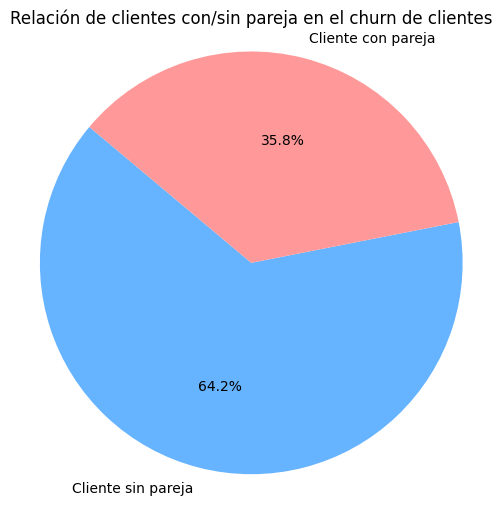

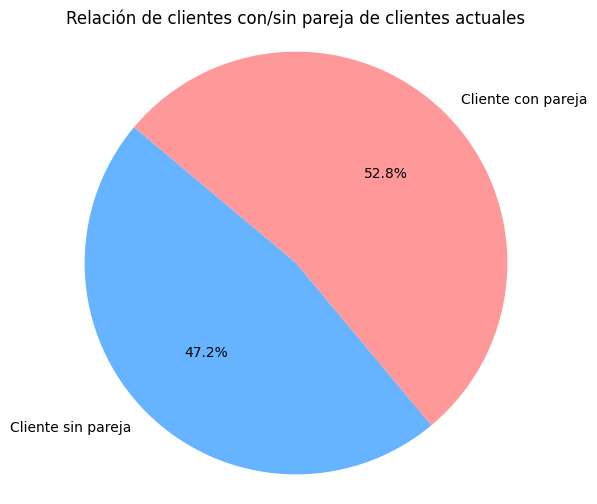

In [1299]:
labels = ['Cliente sin pareja', 'Cliente con pareja']
sizes = [porcentaje_no_partner, porcentaje_partner]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Relación de clientes con/sin pareja en el churn de clientes')
plt.axis('equal')  # Hace que el pastel se vea circular
plt.show()

labels = ['Cliente sin pareja', 'Cliente con pareja']
sizes = [porcentaje_no_partner_stay, porcentaje_partner_stay]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Relación de clientes con/sin pareja de clientes actuales')
plt.axis('equal')  # Hace que el pastel se vea circular
plt.show()

En esta ocasión, otro insight valioso fue encontrar que el cliente con pareja tiende a quedarse mas tiempo con el servicio, que alguien soltero, al parecer los clientes con pareja si ven Netflix o usan internet juntos, quizas ven algun beneficio a largo plazo?. 

/tmp/ipykernel_3713/3092605071.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=clients_go, x='Type', order=clients_go['Type'].value_counts().index, palette='Set2')


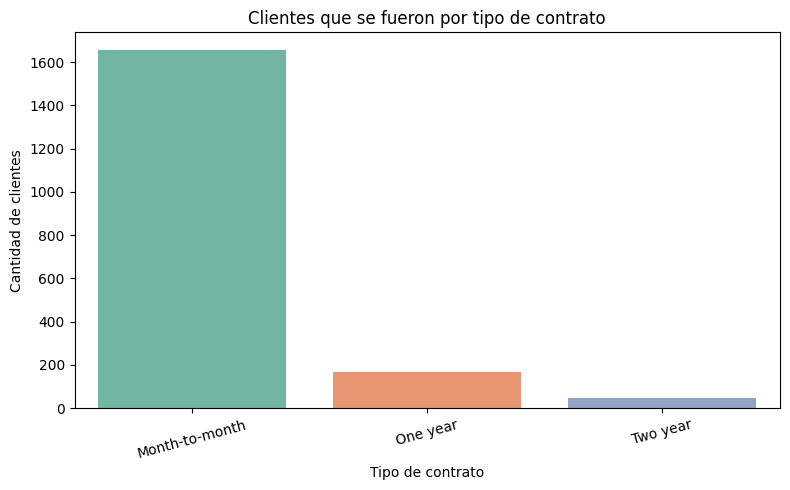

In [1300]:
plt.figure(figsize=(8,5))
sns.countplot(data=clients_go, x='Type', order=clients_go['Type'].value_counts().index, palette='Set2')
plt.title('Clientes que se fueron por tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

Otro insight interesante resulta ser el tipo de contrato... al parece un contrato mensual no retiene a los clientes por mucho tiempo. 

/tmp/ipykernel_3713/1612960091.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=clients_go, x='InternetService', order=clients_go['InternetService'].value_counts().index, palette='Set2')


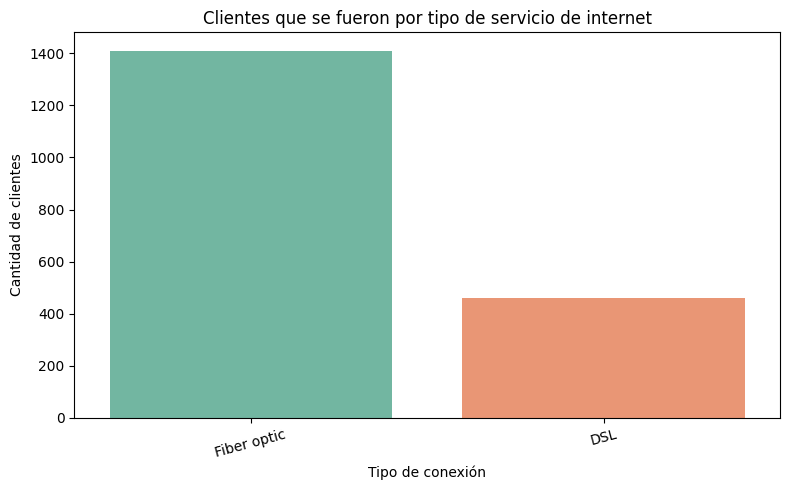

In [1301]:
plt.figure(figsize=(8,5))
sns.countplot(data=clients_go, x='InternetService', order=clients_go['InternetService'].value_counts().index, palette='Set2')
plt.title('Clientes que se fueron por tipo de servicio de internet')
plt.xlabel('Tipo de conexión')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

Y asi, tambien hay insights, que aunque extraños, valiosos, pues parece que el tipo de clientes al que esta viendo la empresa no es el correcto, o quizas su servicio de fibra optica esta siendo muy caro¿?

In [1302]:
clients_go_with_phone = clients_go[clients_go['MultipleLines']== 'Yes']
clients_go_without_phone = clients_go[clients_go['MultipleLines']== 'No']
clients_stay_with_phone= clients_stay[clients_stay['MultipleLines']== 'Yes']
clients_stay_without_phone = clients_stay[clients_stay['MultipleLines']== 'No']


In [1303]:
porcentaje_phone = len(clients_go_with_phone) / total * 100
porcentaje_no_phone = len(clients_go_without_phone) / total * 100

porcentaje_phone_stay = len(clients_stay_with_phone) / total_stay * 100
porcentaje_no_phone_stay = len(clients_stay_without_phone) / total_stay * 100

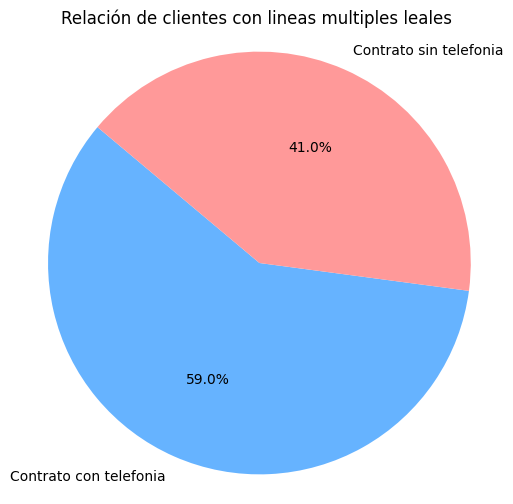

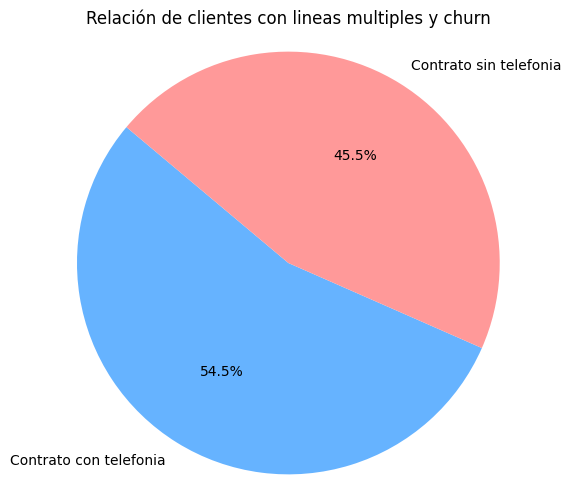

In [1304]:
labels = ['Contrato con telefonia', 'Contrato sin telefonia']
sizes = [porcentaje_no_phone_stay, porcentaje_phone_stay]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Relación de clientes con lineas multiples leales ')
plt.axis('equal')  # Hace que el pastel se vea circular
plt.show()

labels = ['Contrato con telefonia', 'Contrato sin telefonia']
sizes = [porcentaje_no_phone, porcentaje_phone]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Relación de clientes con lineas multiples y churn')
plt.axis('equal')  # Hace que el pastel se vea circular
plt.show()

## Plan de acción : preparación del modelado. 

- Durante esta etapa del proyecto, se estableceran los parametros que se necesiten para preparar el entrenamiento de nuestro modelo.
- Se iniciará con la conversión de variables categóricas a variables numéricas(one-hot-encoding o label encoding).
- Escalar datos (si es necesario).
- Dividir el dataset en conjuntos de entrenamiento y prueba. 

### Combinaciones de columnas de fechas


In [1305]:
#Creamos nuevas columnas para el modelo mediante la division de fechas, asi eliminamos BeginDate, se vuelve inecesaria
df['begin_year'] = df['BeginDate'].dt.year
df['begin_month'] = df['BeginDate'].dt.month

In [1306]:
df.drop(columns=['BeginDate'], inplace=True)

### Preparación de los datos de columnas para el modelado. ###

Como los modelos no soportan datos enteros, es necesario modificarlos a algun tipo de dato numerico, cambiando True y False por 1 y 0, sigue siendo binario, solo no es texto. 

In [1307]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: True, 0: False})

In [1308]:
cols_yes_no = ['PaperlessBilling', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Partner', 'Dependents', 'MultipleLines']  # pon aquí tus columnas con Yes/No

for col in cols_yes_no:
    df[col] = df[col].map({'Yes': True, 'No': False})

### Metodo get_dummies para el manejo de catos categoricos.

In [1309]:
df = pd.get_dummies(df, columns=['Type', 'PaymentMethod', 'InternetService', 'gender'])
print()
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   customerID                               7043 non-null   category      
 1   EndDate                                  7043 non-null   datetime64[ns]
 2   PaperlessBilling                         7043 non-null   bool          
 3   MonthlyCharges                           7043 non-null   float64       
 4   TotalCharges                             7043 non-null   float64       
 5   OnlineSecurity                           5517 non-null   object        
 6   OnlineBackup                             5517 non-null   object        
 7   DeviceProtection                         5517 non-null   object        
 8   TechSupport                              5517 non-null   object        
 9   StreamingTV                             

In [1310]:
df["OnlineSecurity"] = df["OnlineSecurity"].fillna(df["OnlineSecurity"].mode()[0])
df["OnlineBackup"] = df["OnlineBackup"].fillna(df["OnlineBackup"].mode()[0])
df["DeviceProtection"] = df["DeviceProtection"].fillna(df["DeviceProtection"].mode()[0])
df["TechSupport"] = df["TechSupport"].fillna(df["TechSupport"].mode()[0])
df["StreamingTV"] = df["StreamingTV"].fillna(df["StreamingTV"].mode()[0])
df["StreamingMovies"] = df["StreamingMovies"].fillna(df["StreamingMovies"].mode()[0])
df.isna().sum()[df.isna().sum() > 0]

/tmp/ipykernel_3713/3937467854.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["OnlineSecurity"] = df["OnlineSecurity"].fillna(df["OnlineSecurity"].mode()[0])
/tmp/ipykernel_3713/3937467854.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["OnlineBackup"] = df["OnlineBackup"].fillna(df["OnlineBackup"].mode()[0])
/tmp/ipykernel_3713/3937467854.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future b

Series([], dtype: int64)

In [1311]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['MonthlyCharges', 'TotalCharges']])

In [1312]:
X = df.drop(['IsToday', 'EndDate', 'customerID'], axis=1)
y = df['IsToday']

In [1313]:
# Limpieza para todos los modelos
X_clean = X.copy()

# 1. Convertir booleanos a enteros
X_clean = X_clean.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# 2. One-hot encoding para columnas categóricas tipo string
X_clean = pd.get_dummies(X_clean)

/tmp/ipykernel_3713/2847941739.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_clean = X_clean.applymap(lambda x: int(x) if isinstance(x, bool) else x)


In [1314]:
X.isna().sum()[X.isna().sum() > 0]

Series([], dtype: int64)

In [1315]:
print(y.value_counts())
print(y.value_counts(normalize=True))

IsToday
1    5174
0    1869
Name: count, dtype: int64
IsToday
1    0.73463
0    0.26537
Name: proportion, dtype: float64


In [1316]:
def entrenar_modelos(X, y, test_size=0.3, random_state=42,
                     logistic_params=None, rf_params=None, xgb_params=None,
                     cv_folds=5):
    
    # Divide los datos
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y)
    
    logistic_params = logistic_params or {}
    rf_params = rf_params or {}

    logistic_params.setdefault('class_weight', 'balanced')
    rf_params.setdefault('class_weight', 'balanced')
    xgb_params = {
    'max_depth': 5,  # Profundidad máxima de los árboles
    'learning_rate': 0.1,  # Tasa de aprendizaje
    'n_estimators': 100,  # Número de árboles
    'objective': 'binary:logistic',  # Objetivo de clasificación binaria
}

    modelos = {
        'Logistic Regression': LogisticRegression(**(logistic_params or {})),
        'Random Forest': RandomForestClassifier(**(rf_params or {})),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', **(xgb_params or {})),
        'lgbm' : LGBMClassifier(class_weight='balanced')
    }

    resultados = {}

    def puntaje_sp(auc):
        if auc < 0.75:
            return "0 SP"
        elif auc < 0.81:
            return "4 SP"
        elif auc < 0.85:
            return "4.5 SP"
        elif auc < 0.87:
            return "5 SP"
        elif auc < 0.88:
            return "5.5 SP"
        else:
            return "6 SP"

    # Configurando validación cruzada
    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=random_state)

    for nombre, modelo in modelos.items():
        print(f"\nEntrenando modelo: {nombre}")

        # Validación cruzada AUC-ROC
        auc_scores = cross_val_score(modelo, X_train, y_train, cv=skf, scoring='roc_auc')
        auc_mean = auc_scores.mean()

        # Evaluación final sobre el conjunto de test
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        y_proba = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else modelo.decision_function(X_test)

        acc = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {acc:.4f}")
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print(f"AUC-ROC en conjunto de test: {roc_auc_score(y_test, y_proba):.4f}")
        print(f"AUC-ROC (validación cruzada): {auc_mean:.4f} → {puntaje_sp(auc_mean)}")

        resultados[nombre] = {
            'modelo': modelo,
            'accuracy': acc,
            'auc_test': roc_auc_score(y_test, y_proba),
            'auc_cv': auc_mean,
            'sp': puntaje_sp(auc_mean),
            'y_test': y_test,
            'y_pred': y_pred,
            'y_proba': y_proba
        }

    return resultados

## Plan de acción : Modelado predictivo.

1.  Aplicar modelos de clasificación como:
    - **Regresión logística** (como modelo base).
    - **Random forest** y/o **XGBoost** para mejorar precisión.
2. Se evaluarán los modelos usando diferentes métricas como precisión, recall, F1-Score. 
    

In [1317]:
resultados = entrenar_modelos(X, y)


Entrenando modelo: Logistic Regression


/workspaces/my_last_dance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/workspaces/my_last_dance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Accuracy: 0.7501
Confusion Matrix:
[[ 433  128]
 [ 400 1152]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.77      0.62       561
           1       0.90      0.74      0.81      1552

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113

AUC-ROC en conjunto de test: 0.8334
AUC-ROC (validación cruzada): 0.8385 → 4.5 SP

Entrenando modelo: Random Forest
Accuracy: 0.8334
Confusion Matrix:
[[ 337  224]
 [ 128 1424]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.60      0.66       561
           1       0.86      0.92      0.89      1552

    accuracy                           0.83      2113
   macro avg       0.79      0.76      0.77      2113
weighted avg       0.83      0.83      0.83      2113

AUC-ROC en conjunto de test: 0.8677
AUC-ROC (validación cruz

/workspaces/my_last_dance/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:22:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/my_last_dance/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:22:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/my_last_dance/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:22:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/my_last_dance/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:22:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/my_l

Accuracy: 0.8632
Confusion Matrix:
[[ 345  216]
 [  73 1479]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.61      0.70       561
           1       0.87      0.95      0.91      1552

    accuracy                           0.86      2113
   macro avg       0.85      0.78      0.81      2113
weighted avg       0.86      0.86      0.86      2113

AUC-ROC en conjunto de test: 0.9017
AUC-ROC (validación cruzada): 0.9064 → 6 SP

Entrenando modelo: lgbm
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2897, number of negative: 1047
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 3944, number of u

In [1318]:
df_corr = df.copy()
df_corr['IsToday'] = y
corrs = df_corr.corr(numeric_only=True)['IsToday'].sort_values(ascending=False)
print(corrs)

IsToday                                    1.000000
Type_Two year                              0.302253
TotalCharges                               0.199428
Type_One year                              0.177820
OnlineSecurity                             0.171226
TechSupport                                0.164674
Dependents                                 0.164221
Partner                                    0.150448
PaymentMethod_Credit card (automatic)      0.134302
InternetService_DSL                        0.124214
PaymentMethod_Bank transfer (automatic)    0.117937
PaymentMethod_Mailed check                 0.091683
OnlineBackup                               0.082255
DeviceProtection                           0.066160
gender_Male                                0.008612
gender_Female                             -0.008612
MultipleLines                             -0.040102
StreamingMovies                           -0.061382
StreamingTV                               -0.063228
InternetServ

## Plan de acción : Conclusiones y recomendaciones. 

1. Se identificarán las variables que más influyen en la fuga de clientes.
2. Se presentarán ideas accionables para reducir la tasa de churn. 
3. Se formularán hipótesis que puedan usarse en futuras etapas de modelado predictivo o toma de decisiones.

Conclusiones. 

1. Las variables mas influyentes en la fuga de clientes, fueron, sin duda las que vimos durante los insights, en los que los porcentajes y conteo de datos no mienten
2. Las ideas accionables para reducir la tasa de churn son: 
    - Es necesario canalizar las estrategias de marketing hacia grupos de personas mayores o con compañero. 
    - Ajustar o incluso actualizar el metodo de pago, refiriendome a eliminar tipos de pago que se estan volviendo obsoletos, de no ser asi, modificar clausulas para ese tipo de contratos en los que los pagos sean problematicos para el cliente. Recomendación: investigar/analizar mas a fondo la relacion de estos metodos de pago, ¿Tiene alguna relacion con la edad de los clientes? ¿Modificar o actualizar el metodo de pago hara que los clientes leales, mayormente mayores, se vayan?
    - Atender las necesidades de los clientes en cuanto a su tipo de internet, probablemente haya mayoria de clientes a los que la fibra optica no les favorece. Recomendaciones: Analizar este motivo a fondo, pues hay ciertas variables escondidas, no es posible saber si la fibra optica se queda atras por precio(mayor probabilidad) u alguna otra razón. 
    - Analizar la parte de los paquetes telefonicos, pareciera que un ligero porcentaje de clientes que pagan un paquete con telefonia se orillan un poco a dejar el servicio... ¿Fallas en lineas telefonicas? ¿Paquetes exigentes sobre pago sobre minutos? ¿Precios de paquetes de telefonia muy altos?

Hipótesis específicas según el modelo:
1. Regresión Logística
Hipótesis: "La regresión logística tiene un rendimiento inferior debido a la posible no linealidad en los patrones de comportamiento de los clientes, lo cual impide una separación clara entre quienes se quedan y quienes se van."

Justificación: Accuracy de 75.01% y AUC-ROC de 0.83 indican un rendimiento aceptable, pero menor que los modelos de árboles. Además, hay un desequilibrio en el recall entre clases (0.77 vs 0.74).

2. Random Forest
Hipótesis: "El modelo Random Forest mejora significativamente la capacidad de predicción de la clase positiva (clientes que se quedan), gracias a su habilidad para capturar interacciones no lineales y manejar características irrelevantes."

Justificación: Accuracy de 84.15% y AUC-ROC de 0.87, con un recall de 0.92 en la clase 1, lo que lo hace muy eficaz para capturar a los clientes que permanecen.

3. XGBoost
Hipótesis: "XGBoost logra un equilibrio superior entre precisión y recall, lo que lo convierte en un modelo altamente efectivo para detectar tanto clientes que se quedan como los que se van."

Justificación: Accuracy de 86.32%, AUC-ROC de 0.90, y una mejora general del f1-score para ambas clases. Buen rendimiento tanto en precisión como en recall.

4. LightGBM
Hipótesis: "LightGBM es el modelo con mejor capacidad predictiva para la retención de clientes, superando al resto de los modelos en todas las métricas evaluadas, posiblemente por su eficiencia al manejar grandes volúmenes de datos y relaciones no lineales."

Justificación: Accuracy de 87.84%, AUC-ROC de 0.91, con f1-scores equilibrados y una mejor separación de clases en la matriz de confusión.